# Import libraries and modules

In [46]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


Reading of data from files is done in the following way:

In [47]:
#We store data from files into variables
transaction_data = pd.read_csv('QVI_transaction_data.csv')
purchase_behaviour_data = pd.read_csv('QVI_purchase_behaviour.csv')

In [48]:
transaction_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

Date is not in proper format so we will format the date properly to make it accurate.


In [49]:
# Convert DATE column to datetime format
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')
print(transaction_data['DATE'].head())

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]


Now lets see if that worked

In [50]:
transaction_data.head(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.10
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20


Wonderful! Now we will go towards checking for any anomalies in the product names.

In [51]:
# Examine PROD_NAME to check for incorrect entries
productWords = pd.DataFrame(transaction_data['PROD_NAME'].str.split(expand=True).stack(), columns=['words'])
print(productWords['words'].unique())

['Natural' 'Chip' 'Compny' 'SeaSalt175g' 'CCs' 'Nacho' 'Cheese' '175g'
 'Smiths' 'Crinkle' 'Cut' 'Chips' 'Chicken' '170g' 'Thinly'
 'S/Cream&Onion' 'Kettle' 'Tortilla' 'ChpsHny&Jlpno' 'Chili' '150g' 'Old'
 'El' 'Paso' 'Salsa' 'Dip' 'Tomato' 'Mild' '300g' 'Salt' '&' 'Vinegar'
 '330g' 'Grain' 'Waves' 'Sweet' 'Chilli' '210g' 'Doritos' 'Corn' 'Mexican'
 'Jalapeno' 'Sour' 'Cream&Chives' '210G' 'Sensations' 'Siracha' 'Lime'
 'Twisties' '270g' 'WW' 'Thins' 'Light&' 'Tangy' 'Original' 'Burger'
 'Rings' '220g' 'NCC' 'Cream' 'Garden' 'Chives' 'Southern' 'Cheezels'
 'Box' '125g' 'Infzns' 'Crn' 'Crnchers' 'Gcamole' '110g' 'Sea' 'And' 'Red'
 'Rock' 'Deli' 'Thai' 'Chilli&Lime' 'Pringles' 'Sthrn' 'FriedChicken'
 '134g' 'Sweet&Spcy' 'BBQ' 'SR' 'Mzzrlla' 'Originl' 'saltd' 'Sp' 'Truffle'
 '150G' 'Swt' 'Chli&S/Cream175G' 'Mexicana' 'French' 'OnionDip' 'ChipCo'
 'Hony' 'Soy' 'Chckn175g' 'Dorito' 'Chp' 'Supreme' '380g' 'Chicken270g'
 'Roast' 'Mozzarella' 'Basil' 'Pesto' 'Infuzions' 'SweetChili' 'PotatoMix'

In [52]:
transaction_data.head(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.10
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20


Just in case, we are also checking to remove any digits and special characters. These can cause error in the data.


In [53]:
# Remove digits and special characters from product words
productWords = productWords[~productWords['words'].str.contains(r'[\d&]')].reset_index(drop=True)
print(productWords['words'].unique())   

['Natural' 'Chip' 'Compny' 'CCs' 'Nacho' 'Cheese' 'Smiths' 'Crinkle' 'Cut'
 'Chips' 'Chicken' 'Thinly' 'Kettle' 'Tortilla' 'Chili' 'Old' 'El' 'Paso'
 'Salsa' 'Dip' 'Tomato' 'Mild' 'Salt' 'Vinegar' 'Grain' 'Waves' 'Sweet'
 'Chilli' 'Doritos' 'Corn' 'Mexican' 'Jalapeno' 'Sour' 'Sensations'
 'Siracha' 'Lime' 'Twisties' 'WW' 'Thins' 'Tangy' 'Original' 'Burger'
 'Rings' 'NCC' 'Cream' 'Garden' 'Chives' 'Southern' 'Cheezels' 'Box'
 'Infzns' 'Crn' 'Crnchers' 'Gcamole' 'Sea' 'And' 'Red' 'Rock' 'Deli'
 'Thai' 'Pringles' 'Sthrn' 'FriedChicken' 'BBQ' 'SR' 'Mzzrlla' 'Originl'
 'saltd' 'Sp' 'Truffle' 'Swt' 'Mexicana' 'French' 'OnionDip' 'ChipCo'
 'Hony' 'Soy' 'Dorito' 'Chp' 'Supreme' 'Roast' 'Mozzarella' 'Basil'
 'Pesto' 'Infuzions' 'SweetChili' 'PotatoMix' 'Camembert' 'Fig' 'Smith'
 'Mac' 'N' 'Honey' 'Seasonedchicken' 'Rib' 'Prawn' 'Crackers' 'GrnWves'
 'Plus' 'Btroot' 'Jam' 'Tyrrells' 'Crisps' 'Lightly' 'Salted' 'Medium'
 'Pot' 'SourCream' 'Onion' 'Chnky' 'Tom' 'Cobs' 'Popd' 'Swt/Chlli'
 'Woolwort

In [54]:
transaction_data.head(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.10
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20


Lets check the demographic and see that were is the customer focus mostly

In [55]:
# Count and sort distinct words by frequency of occurrence
word_counts = productWords['words'].value_counts().reset_index()
word_counts.columns = ['word', 'frequency']
print(word_counts)


          word  frequency
0        Chips      49770
1       Kettle      41288
2       Smiths      28860
3         Salt      27976
4       Cheese      27890
..         ...        ...
166  Frch/Onin       1432
167         Pc       1431
168        NCC       1419
169     Garden       1419
170      Fries       1418

[171 rows x 2 columns]


In [56]:
transaction_data.head(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.10
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20


Based on the uploaded solution, we are abke to confirm that the mentioned 'salsa' are not flavoured chips but rather they are dips and hence not a part of our data. Hence, we shall remove them.

In [57]:
# Remove salsa products
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa', case=False)]
print(transaction_data['PROD_NAME'].unique()) 

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Thins Chips         Originl saltd 175g'
 'Red Rock De

Lets classify the chips packets based on their weight in grams

In [58]:
# Convert PACK_SIZE to numeric
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract('(\d+)').astype(float)
print(transaction_data['PACK_SIZE'].unique())

[175. 170. 150. 330. 210. 270. 220. 125. 110. 134. 380. 180. 165. 135.
 250. 200. 160. 190.  90.  70.]


In [59]:
transaction_data.head(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,150.0
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330.0
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60,210.0
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90,150.0
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20,210.0
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330.0


In the data, there is random data with no identification for the products, so lets extract the brand names and see what they are. 

In [60]:
# Extract brand from product name
transaction_data['BRAND'] =transaction_data['PROD_NAME'].str.split().str[0]
print(transaction_data['BRAND'].unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'RRD' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


In [61]:
transaction_data.head(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,150.0,Kettle
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330.0,Smiths
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60,210.0,Grain
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90,150.0,Doritos
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20,210.0,Grain
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330.0,Smiths


In [62]:
# Combine similar brand names
transaction_data['BRAND'] =transaction_data['BRAND'].replace('RED', 'RRD')
print(transaction_data['BRAND'].unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'RRD' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


In [63]:
transaction_data.head(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,150.0,Kettle
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330.0,Smiths
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60,210.0,Grain
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90,150.0,Doritos
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20,210.0,Grain
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330.0,Smiths


Finally, we are sure that there are no further issues in transaction data so we will merge the CSV files.

In [64]:
# Merge transaction data and customer data
data = pd.merge(transaction_data, purchase_behaviour_data, how='left', on='LYLTY_CARD_NBR')
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [65]:
data.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
PACK_SIZE                  float64
BRAND                       object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

## Merged Data

Now we calculate the total sales and classify customers based on their age groups and their customer category.

In [66]:
# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
total_sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
print(total_sales)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   33345.70
1   MIDAGE SINGLES/COUPLES       Mainstream   84734.25
2   MIDAGE SINGLES/COUPLES          Premium   54443.85
3             NEW FAMILIES           Budget   20607.45
4             NEW FAMILIES       Mainstream   15979.70
5             NEW FAMILIES          Premium   10760.80
6           OLDER FAMILIES           Budget  156863.75
7           OLDER FAMILIES       Mainstream   96413.55
8           OLDER FAMILIES          Premium   76542.60
9    OLDER SINGLES/COUPLES           Budget  127833.60
10   OLDER SINGLES/COUPLES       Mainstream  124648.50
11   OLDER SINGLES/COUPLES          Premium  123537.55
12                RETIREES           Budget  105916.30
13                RETIREES       Mainstream  145168.95
14                RETIREES          Premium   91296.65
15          YOUNG FAMILIES           Budget  129717.95
16          YOUNG FAMILIES       Mainstream   86338.25
17        

Customer count:

In [67]:
# Calculate number of customers by LIFESTAGE and PREMIUM_CUSTOMER
num_customers = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
print(num_customers)

                 LIFESTAGE PREMIUM_CUSTOMER  LYLTY_CARD_NBR
0   MIDAGE SINGLES/COUPLES           Budget            1474
1   MIDAGE SINGLES/COUPLES       Mainstream            3298
2   MIDAGE SINGLES/COUPLES          Premium            2369
3             NEW FAMILIES           Budget            1087
4             NEW FAMILIES       Mainstream             830
5             NEW FAMILIES          Premium             575
6           OLDER FAMILIES           Budget            4611
7           OLDER FAMILIES       Mainstream            2788
8           OLDER FAMILIES          Premium            2232
9    OLDER SINGLES/COUPLES           Budget            4849
10   OLDER SINGLES/COUPLES       Mainstream            4858
11   OLDER SINGLES/COUPLES          Premium            4682
12                RETIREES           Budget            4385
13                RETIREES       Mainstream            6358
14                RETIREES          Premium            3812
15          YOUNG FAMILIES           Bud

Average number of units per customer:

In [68]:
# Calculate average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units_per_customer = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()
print(avg_units_per_customer) 

                 LIFESTAGE PREMIUM_CUSTOMER  PROD_QTY
0   MIDAGE SINGLES/COUPLES           Budget  1.893626
1   MIDAGE SINGLES/COUPLES       Mainstream  1.911942
2   MIDAGE SINGLES/COUPLES          Premium  1.891750
3             NEW FAMILIES           Budget  1.855878
4             NEW FAMILIES       Mainstream  1.858124
5             NEW FAMILIES          Premium  1.860887
6           OLDER FAMILIES           Budget  1.945384
7           OLDER FAMILIES       Mainstream  1.948795
8           OLDER FAMILIES          Premium  1.983566
9    OLDER SINGLES/COUPLES           Budget  1.914920
10   OLDER SINGLES/COUPLES       Mainstream  1.911201
11   OLDER SINGLES/COUPLES          Premium  1.913949
12                RETIREES           Budget  1.893286
13                RETIREES       Mainstream  1.886680
14                RETIREES          Premium  1.901438
15          YOUNG FAMILIES           Budget  1.941226
16          YOUNG FAMILIES       Mainstream  1.941408
17          YOUNG FAMILIES  

Average price per unit:

In [69]:
# Calculate average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()
print(avg_price_per_unit)   # print the result

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   7.108442
1   MIDAGE SINGLES/COUPLES       Mainstream   7.637156
2   MIDAGE SINGLES/COUPLES          Premium   7.152371
3             NEW FAMILIES           Budget   7.297256
4             NEW FAMILIES       Mainstream   7.313364
5             NEW FAMILIES          Premium   7.231720
6           OLDER FAMILIES           Budget   7.291241
7           OLDER FAMILIES       Mainstream   7.281440
8           OLDER FAMILIES          Premium   7.356329
9    OLDER SINGLES/COUPLES           Budget   7.444305
10   OLDER SINGLES/COUPLES       Mainstream   7.306049
11   OLDER SINGLES/COUPLES          Premium   7.459997
12                RETIREES           Budget   7.445786
13                RETIREES       Mainstream   7.269352
14                RETIREES          Premium   7.461315
15          YOUNG FAMILIES           Budget   7.302705
16          YOUNG FAMILIES       Mainstream   7.226772
17        

T-Test is performed on the different age categories.

In [70]:
# Perform t-test between mainstream vs premium and budget midage and young singles and couples
mainstream_mask = data['PREMIUM_CUSTOMER'].isin(['Mainstream', 'Budget'])
midage_and_young_mask = data['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])
ttest_result = ttest_ind(data[mainstream_mask & midage_and_young_mask]['TOT_SALES'],
                         data[~mainstream_mask & midage_and_young_mask]['TOT_SALES'])


## Graphical Visualisation of the Data

We create different variables for seperate visualisations and keep our original data secure from any changes.

In [71]:
# Create a date range for the full period 
start_date = transaction_data['DATE'].min()
end_date = transaction_data['DATE'].max()
date_range = pd.date_range(start_date, end_date)

In [72]:
# Analyze transaction trends over time
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], format='%Y%m%d')
transactions_by_day = transaction_data.groupby('DATE').size().reset_index(name='TRANSACTION_COUNT').fillna(0)


In [73]:
# Resample to weekly sum and calculate 4 week moving average
transactions_by_day['WEEK'] = transactions_by_day['DATE'].dt.strftime('%Y-%U')
transactions_weekly = transactions_by_day.groupby('WEEK')['TRANSACTION_COUNT'].sum().reset_index()
transactions_weekly['4WK_AVG'] = transactions_weekly['TRANSACTION_COUNT'].rolling(4).mean()


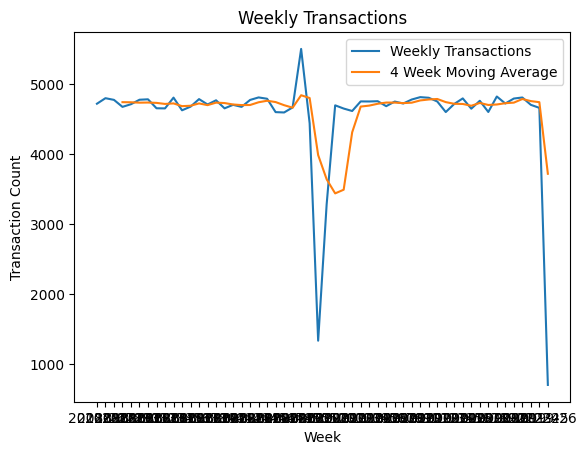

In [74]:
# Plot weekly transaction count and 4 week moving average
plt.plot(transactions_weekly['WEEK'], transactions_weekly['TRANSACTION_COUNT'], label='Weekly Transactions') 
plt.plot(transactions_weekly['WEEK'], transactions_weekly['4WK_AVG'], label='4 Week Moving Average')
plt.xlabel('Week'); plt.ylabel('Transaction Count'); plt.title('Weekly Transactions');
plt.legend()

In [75]:
basket_size = transaction_data.groupby(['DATE'])['PROD_QTY'].sum().reset_index()
dates = transaction_data[['DATE']].drop_duplicates()
basket_size = basket_size.merge(dates, how='left', on='DATE')

basket_size.head(50)

,DATE,PROD_QTY
0,2018-07-01,1273
1,2018-07-02,1251
2,2018-07-03,1296
3,2018-07-04,1286
4,2018-07-05,1258
5,2018-07-06,1369
6,2018-07-07,1337
7,2018-07-08,1254
8,2018-07-09,1335
9,2018-07-10,1237


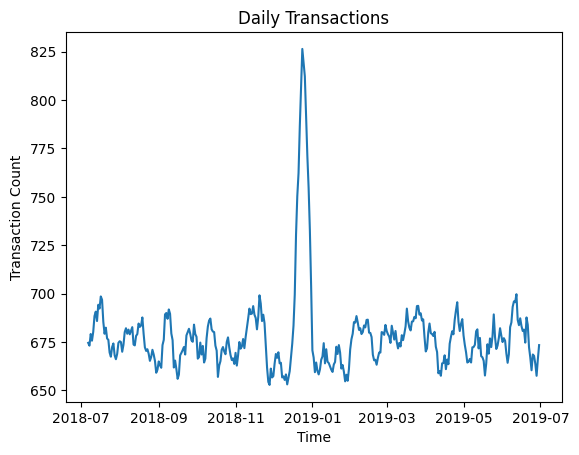

In [94]:
# Rolling averages
transactions_by_day['7D_AVG'] = transactions_by_day['TRANSACTION_COUNT'].rolling(7).mean()
plt.plot(transactions_by_day['DATE'], transactions_by_day['7D_AVG'])
plt.xlabel('Time'); plt.ylabel('Transaction Count'); plt.title('Daily Transactions');


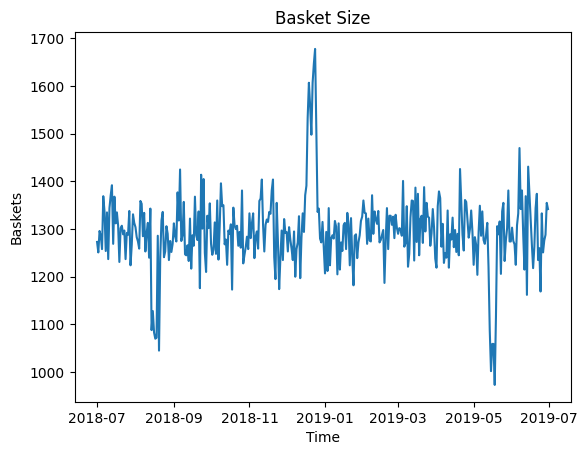

In [95]:
# Basket size 
basket_size = transaction_data.groupby('DATE')['PROD_QTY'].sum().reset_index()
plt.plot(basket_size['DATE'], basket_size['PROD_QTY'])
plt.xlabel('Time'); plt.ylabel('Baskets'); plt.title('Basket Size');


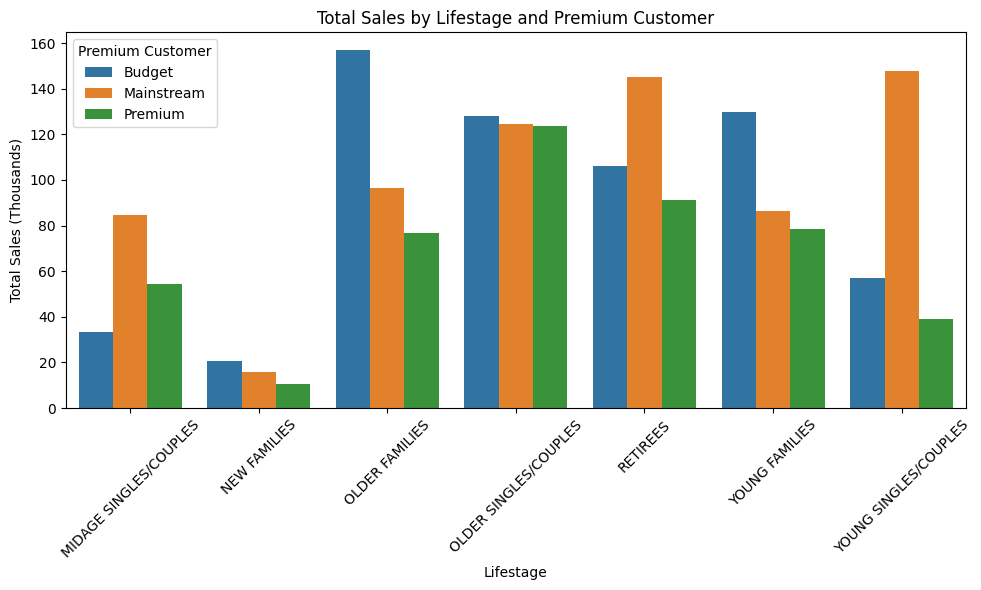

In [78]:
# Plotting total sales by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(10, 6))
total_sales['total_sales'] = total_sales['TOT_SALES'] / 1000  # Convert to thousands for better visualization
ax = sns.barplot(x='LIFESTAGE', y='total_sales', hue='PREMIUM_CUSTOMER', data=total_sales)
ax.set_xlabel('Lifestage')
ax.set_ylabel('Total Sales (Thousands)')
ax.set_title('Total Sales by Lifestage and Premium Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper left')
plt.tight_layout()
plt.show()


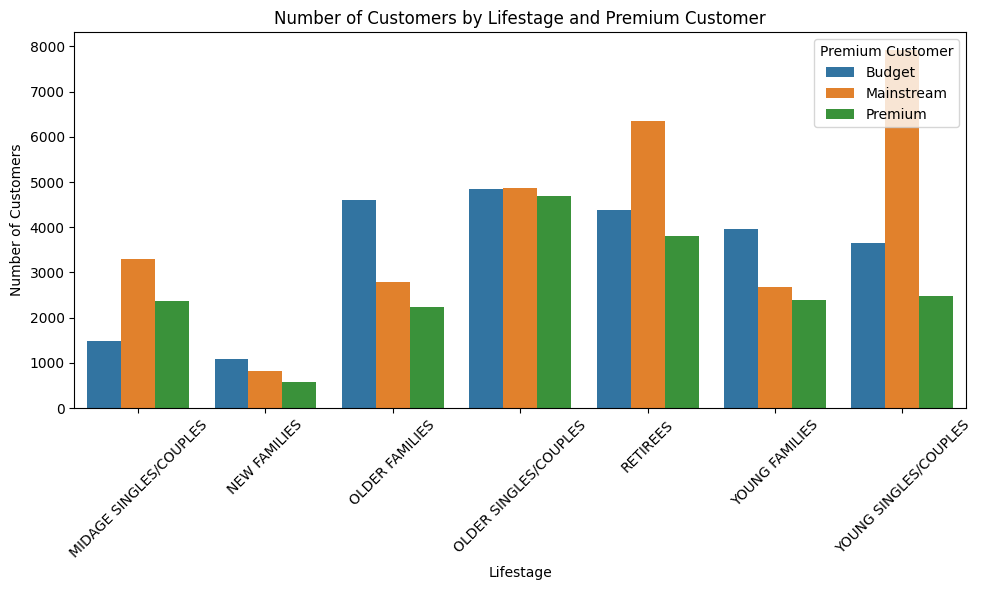

In [79]:
# Plotting number of customers by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(10, 6))
num_customers['num_customers'] = num_customers['LYLTY_CARD_NBR']
ax = sns.barplot(x='LIFESTAGE', y='num_customers', hue='PREMIUM_CUSTOMER', data=num_customers)
ax.set_xlabel('Lifestage')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Lifestage and Premium Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper right')
plt.tight_layout()
plt.show()

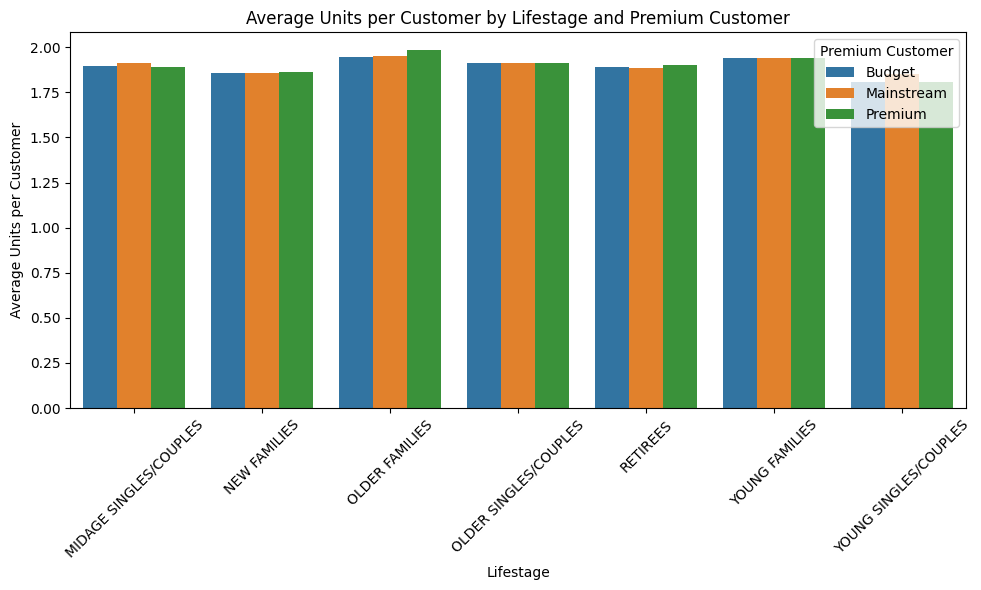

In [80]:
# Plotting average units per customer by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=avg_units_per_customer)
ax.set_xlabel('Lifestage')
ax.set_ylabel('Average Units per Customer')
ax.set_title('Average Units per Customer by Lifestage and Premium Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper right')
plt.tight_layout()
plt.show()

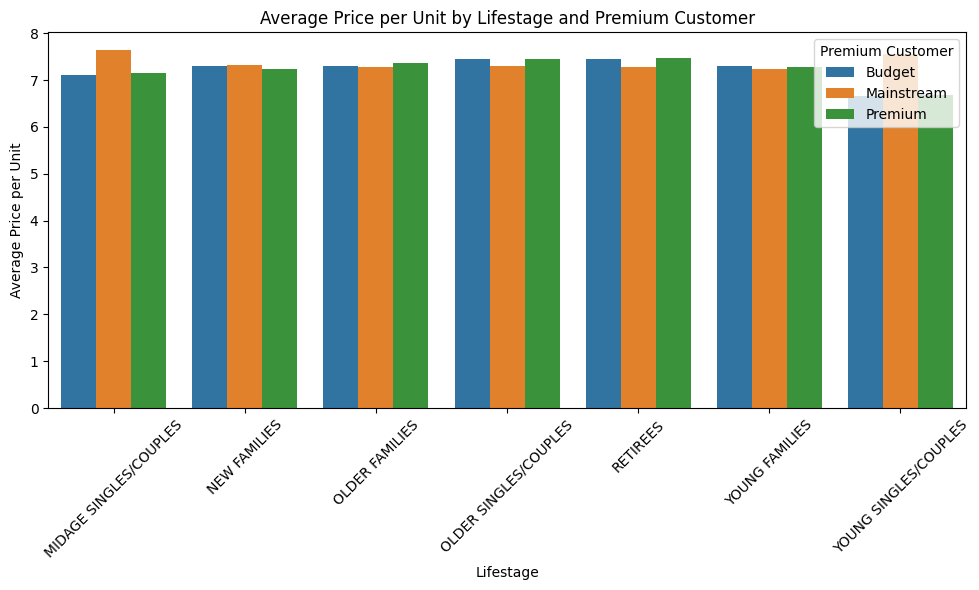

In [81]:
# Plotting average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=avg_price_per_unit)
ax.set_xlabel('Lifestage')
ax.set_ylabel('Average Price per Unit')
ax.set_title('Average Price per Unit by Lifestage and Premium Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper right')
plt.tight_layout()
plt.show()

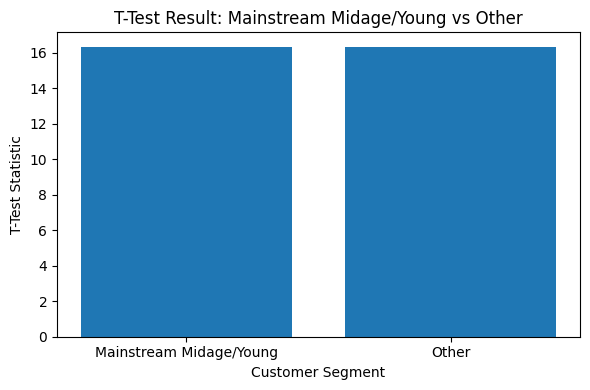

In [82]:
# Extract t-test statistic from the result
ttest_statistic = ttest_result.statistic

# Plotting t-test result
plt.figure(figsize=(6, 4))
plt.bar(['Mainstream Midage/Young', 'Other'], ttest_statistic)
plt.xlabel('Customer Segment')
plt.ylabel('T-Test Statistic')
plt.title('T-Test Result: Mainstream Midage/Young vs Other')
plt.tight_layout()
plt.show()


In [83]:
# Calculate the top 5 most popular chip brands by customer segment
top_brands = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND'])['PROD_QTY'].sum().reset_index()
top_brands = top_brands.sort_values(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PROD_QTY'], ascending=[True, True, False])
top_brands = top_brands.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).head(5)


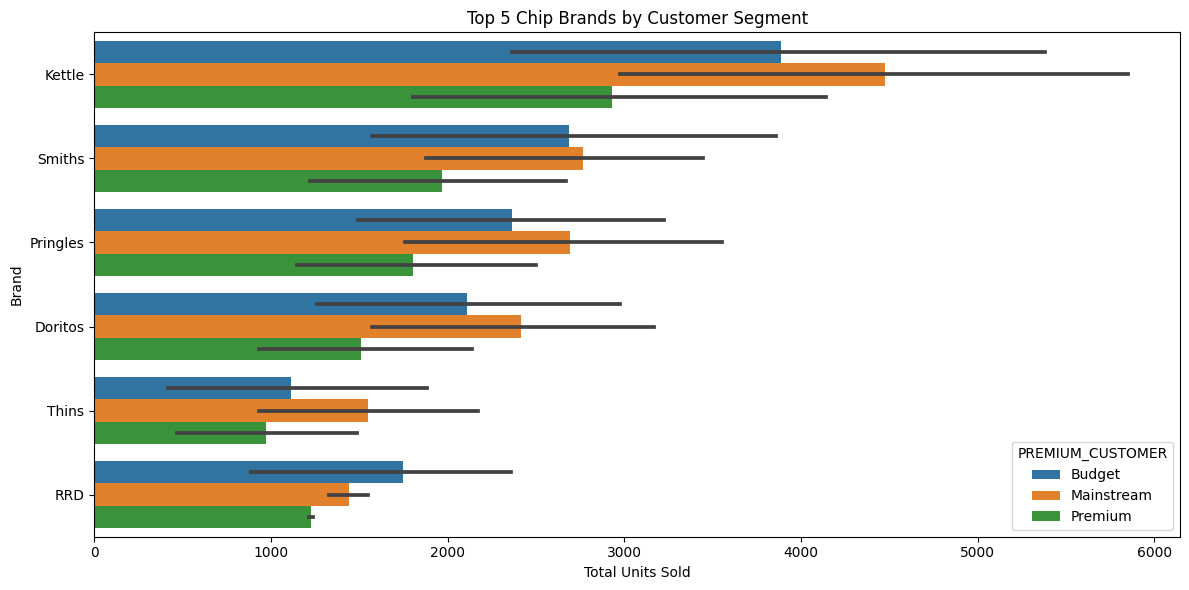

In [84]:
# Plotting top 5 chip brands by customer segment
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='PROD_QTY', y='BRAND', hue='PREMIUM_CUSTOMER', data=top_brands)
ax.set_xlabel('Total Units Sold')
ax.set_ylabel('Brand')
ax.set_title('Top 5 Chip Brands by Customer Segment')
plt.tight_layout()
plt.show()

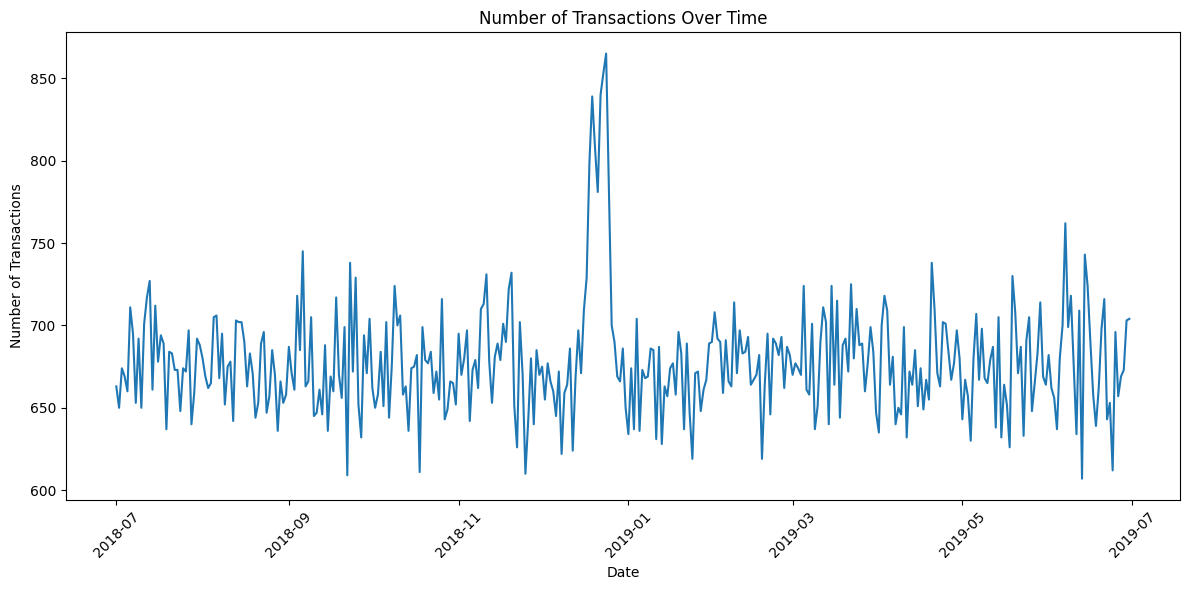

In [85]:
# Plotting number of transactions over time
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='DATE', y='TRANSACTION_COUNT', data=transactions_by_day)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Transactions')
ax.set_title('Number of Transactions Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
# Filter data for December
december_data = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]

In [87]:
december_data.head(50)

,DATE,TRANSACTION_COUNT,WEEK,7D_AVG
153,2018-12-01,675,2018-47,657.428571
154,2018-12-02,655,2018-48,663.857143
155,2018-12-03,677,2018-48,668.857143
156,2018-12-04,666,2018-48,666.857143
157,2018-12-05,660,2018-48,669.714286
158,2018-12-06,645,2018-48,664.000000
159,2018-12-07,672,2018-48,664.285714
160,2018-12-08,622,2018-48,656.714286
161,2018-12-09,659,2018-49,657.285714
162,2018-12-10,664,2018-49,655.428571


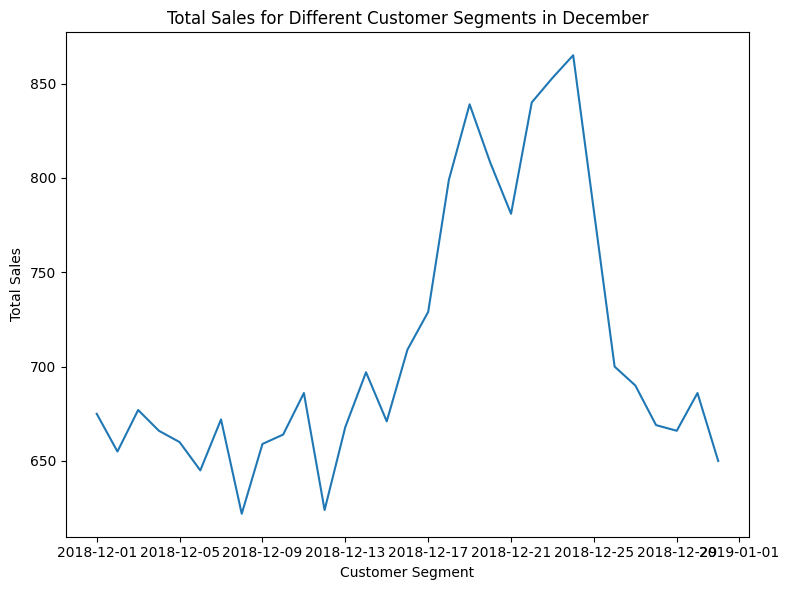

In [88]:

# Plotting the total sales for different customer segments in December
plt.figure(figsize=(8, 6))
ax = sns.lineplot(x='DATE', y='TRANSACTION_COUNT', data=december_data)
ax.set_xlabel('Customer Segment')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales for Different Customer Segments in December')
plt.tight_layout()
plt.show()

In [89]:
data.to_csv('QVI_data.csv', index=False)

In the end, we have the final result and have successfully completed the task. I hope that it is easily understandable and I have tried to explain it as much as possible. Thank you for reading this notebook and I hope you have a great day!

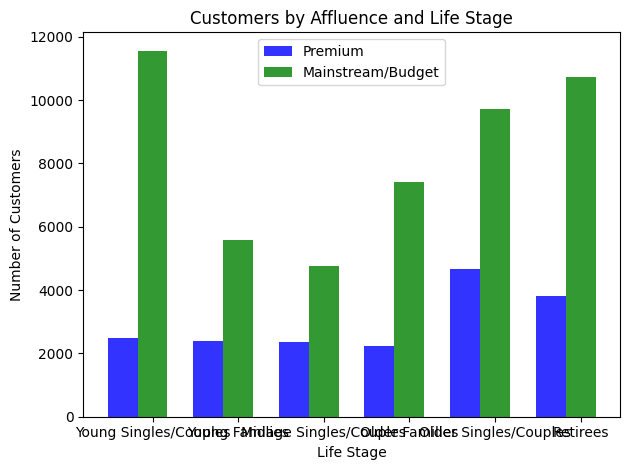

In [90]:

# Data
labels = ['Young Singles/Couples', 'Young Families', 'Midage Singles/Couples', 
          'Older Families', 'Older Singles/Couples', 'Retirees']
premium = [2480, 2398, 2369, 2232, 4682, 3812]
mainstream_budget = [11564, 5578, 4772, 7399, 9707, 10743] 

# Plot 
fig, ax = plt.subplots()
index = np.arange(len(labels))
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, premium, bar_width, alpha=opacity, color='b',
                 label='Premium')
 
rects2 = plt.bar(index + bar_width, mainstream_budget, bar_width,
                 alpha=opacity, color='g', label='Mainstream/Budget')
 
plt.xlabel('Life Stage')
plt.ylabel('Number of Customers')
plt.title('Customers by Affluence and Life Stage')
plt.xticks(index + bar_width, labels)
plt.legend()

plt.tight_layout()
plt.show()